In [2]:
import pandas as pd
import numpy as np
import jieba
import re
from gensim import corpora


In [3]:
train = pd.read_csv("train.csv",delimiter="\t",encoding="utf-8")
test = pd.read_csv("test.csv",delimiter="\t",encoding="utf-8")

In [4]:
l2n = {"FAVOR":2,"AGAINST":1,"NONE":0}
n2l = {2:"FAVOR",1:"AGAINST",0:"NONE"}
train["stance"] = train["stance"].map(l2n)

In [5]:
def stopwordslist():
    stopwords = [line.strip() for line in open('cn_stopwords.txt',encoding='UTF-8').readlines()]
    return stopwords

def removepre(sentence):
    pattern = re.compile("[^a-zA-Z0-9\u4E00-\u9FA5]")
    sentence = pattern.sub("",sentence)
    sentence = sentence.replace("#","")
    sentence = sentence.replace("【","")
    sentence = sentence.replace("】","")
    return sentence


def removenumber(sentence):
    pattern = re.compile("[\d+]")
    sentence = pattern.sub("",sentence)
    return sentence
    
        
def seg_depart(sentence):
     # 对文档中的每一行进行中文分词
    sentence_depart = jieba.cut(sentence.strip())
     # 创建一个停用词列表
    stopwords = stopwordslist()
    # 输出结果为outstr
    outstr = ''
   # 去停用词
    for word in sentence_depart:
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr  

In [6]:
train["cut"] = train["text"].apply(removepre)
test["cut"] = test["text"].apply(removepre)

train["cut"] = train["cut"].apply(removenumber)
test["cut"] = train["cut"].apply(removenumber)

train["cut"] = train["cut"].apply(seg_depart)
test["cut"] = train["cut"].apply(seg_depart)



Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 0.613 seconds.
Prefix dict has been built successfully.


In [15]:
import matplotlib.pyplot as plt

train["length"] = train["cut"].apply(lambda x: len(x))

In [16]:
train

,target,text,stance,cut,length
0,开放二胎,刚回家几天就迫不及待的赶到了小舅家，看着乖巧懂事的表妹和可爱的小表弟，心情格外舒畅！这个画面...,2,刚 回家 几天 迫不及待 赶到 小舅 家 看着 乖巧 懂事 表妹 可爱 小表弟 心情 格外 ...,115
1,俄罗斯在叙利亚的反恐行动,俄罗斯就是流氓,1,俄罗斯 流氓,7
2,春节放鞭炮,#春节放鞭炮#【中央气象台首次发布烟花爆竹燃放气象指数】明天就是除夕了，年味越发浓郁。今早，...,1,春节 放鞭炮 中央气象台 首次 发布 烟花爆竹 燃放 气象 指数 明天 除夕 年 味 越发 ...,164
3,IphoneSE,iPhoneSE貌似摄像头不外突了，普天同庆,2,iPhoneSE 貌似 摄像头 外突 普天同庆,24
4,春节放鞭炮,千万人口级城市北京，原住民在庆祝第一大节日春节，大家伙都心照不宣的想到：别再给伤痕累累的家乡...,1,千万 人口 级 城市 北京 原住民 庆祝 第一 节日 春节 大家伙 心照不宣 想到 伤痕累累...,143
...,...,...,...,...,...
2395,春节放鞭炮,"关于穿中国传统服饰的问题, 应该上升到一种战略的高度来看. 这样,可以在全世界范围内, 把华...",2,穿 中国 传统 服饰 问题 应该 上升 一种 战略 高度 来看 全世界 范围 华人 力量 团...,145
2396,春节放鞭炮,#春节1980s#今天农历腊月二十三。按照豫西南传统的春节习俗，今天正式开始进入过年的前奏。...,2,春节 s 今天 农历 腊月 二十三 豫西南 传统 春节 习俗 今天 正式 进入 过年 前奏 ...,145
2397,俄罗斯在叙利亚的反恐行动,杀啊 把恐怖份子杀干净。,2,杀 恐怖份子 杀 干净,12
2398,深圳禁摩限电,#深圳禁摩限电# 持续进行中,0,深圳 禁摩 限电 持续 进行 中,17


(array([450., 570., 462., 381., 381., 150.,   4.,   0.,   1.,   1.]),
 array([  3. ,  31.6,  60.2,  88.8, 117.4, 146. , 174.6, 203.2, 231.8,
        260.4, 289. ]),
 <a list of 10 Patch objects>)

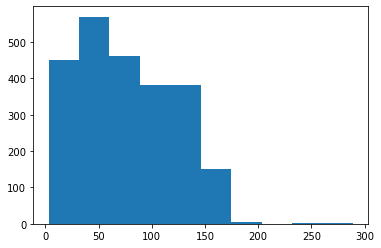

In [18]:
plt.hist(train["length"])